In [303]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as  sns

In [304]:
import warnings
warnings.simplefilter("ignore")

In [305]:
data = pd.read_csv("train.csv")
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN25630,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,INN14474,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,INN23721,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,INN05844,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,INN18710,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [306]:
data.columns


Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [307]:
data.shape

(29020, 19)

In [308]:
data.drop(columns=['Booking_ID'], inplace=True)

In [309]:
data.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [310]:
data.duplicated().sum()

np.int64(7661)

In [311]:
data.drop_duplicates(inplace=True)

In [312]:
data['no_of_children'].value_counts()

no_of_children
0     19251
1      1257
2       837
3        11
9         2
10        1
Name: count, dtype: int64

In [313]:
data['required_car_parking_space'].value_counts()


required_car_parking_space
0    20452
1      907
Name: count, dtype: int64

In [314]:
cat_cols = ['type_of_meal_plan', 'required_car_parking_space','room_type_reserved', 'market_segment_type', 'booking_status', 'booking_status']

num_cols = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights','no_of_week_nights', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']

In [315]:
len(cat_cols), len(num_cols)

(6, 11)

In [316]:
data = data.copy()

In [317]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


##### UNIVARIANT ANALYSIS

In [318]:
def num_plots_dist(data , num_features):
    fig , axes = plt.subplots(len(num_features),2,figsize=(15,len(num_features)*5))
    if len(num_features) ==1:
        axes=[axes]

    for i,collumn in enumerate(num_features):
        sns.histplot(data=data , x=collumn , ax=axes[i][0], kde=True, palette="flare")
        axes[i][0].set_title(f'Distribution of {collumn}')

        sns.boxplot(data=data , x=collumn , ax=axes[i][1], palette="flare")
        axes[i][1].set_title(f'Boxplot of {collumn}')   

    plt.tight_layout()
    plt.show()

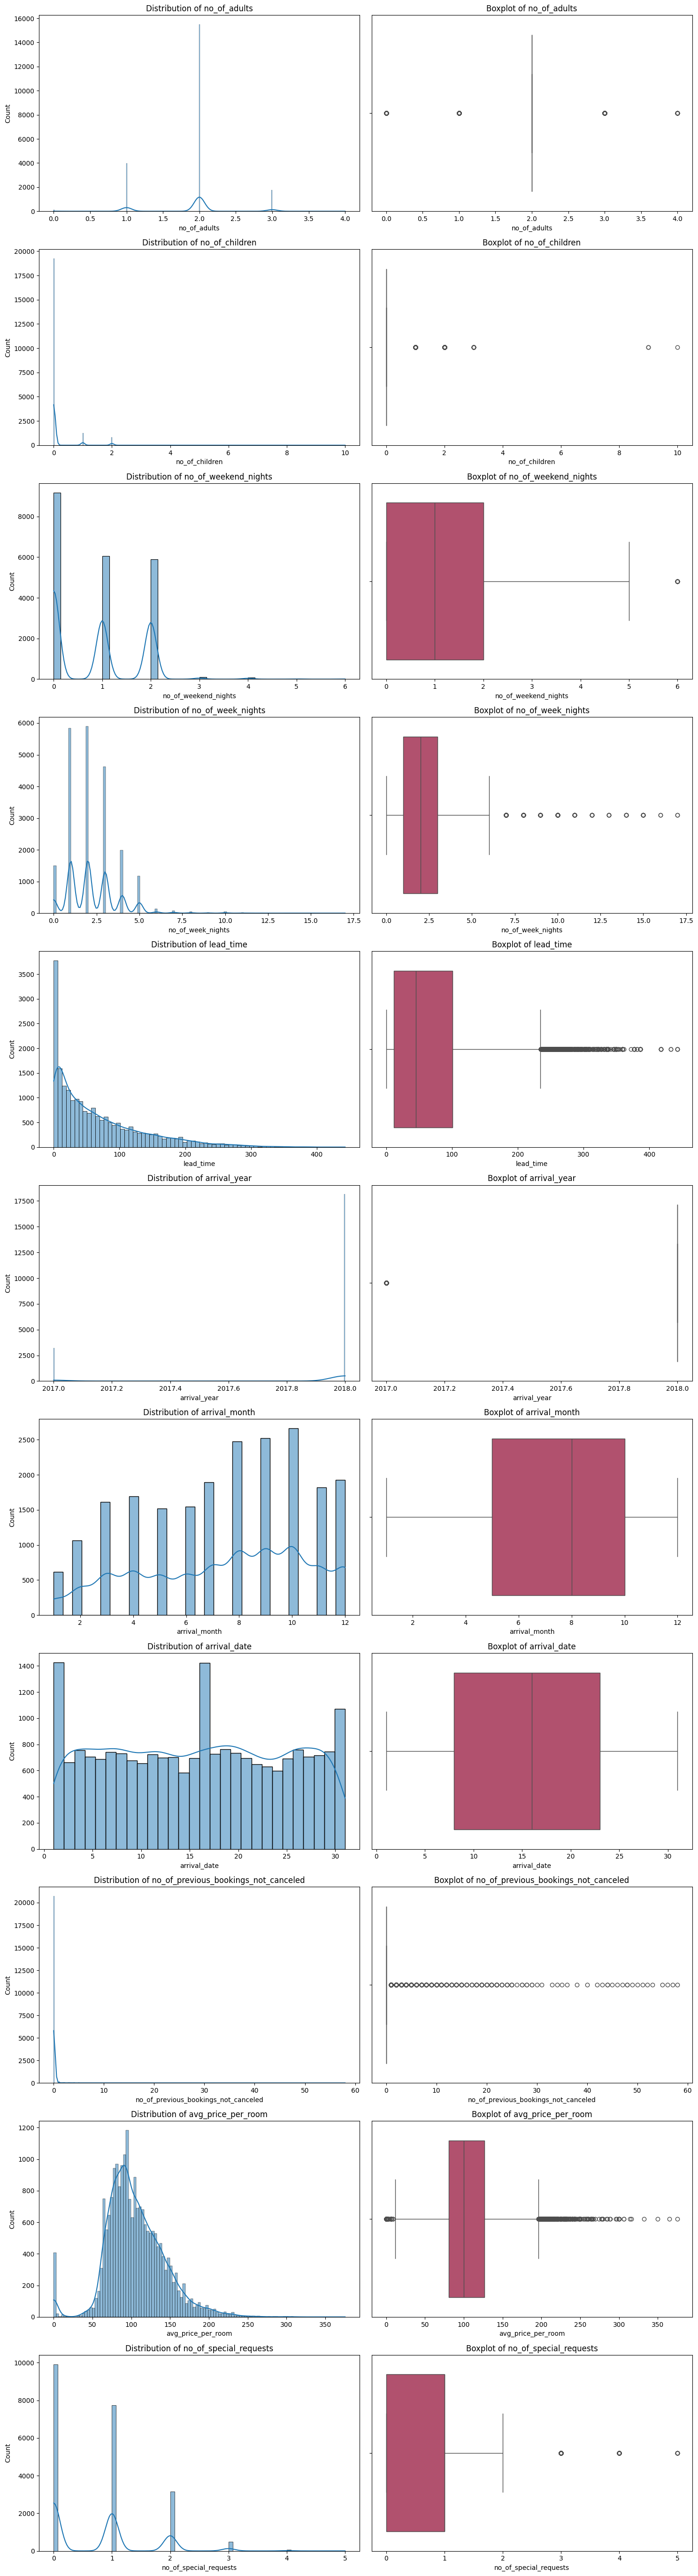

In [319]:
num_plots_dist(data , num_cols)

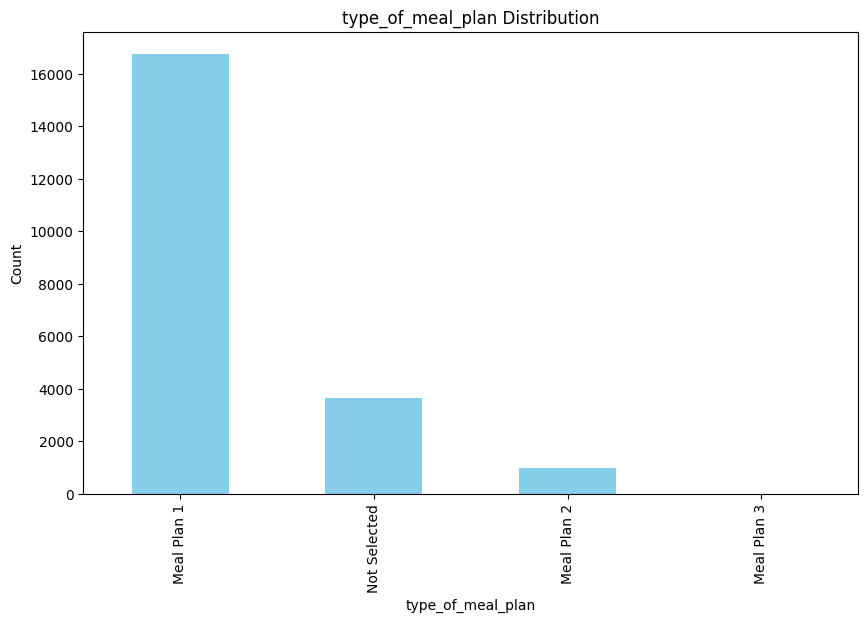

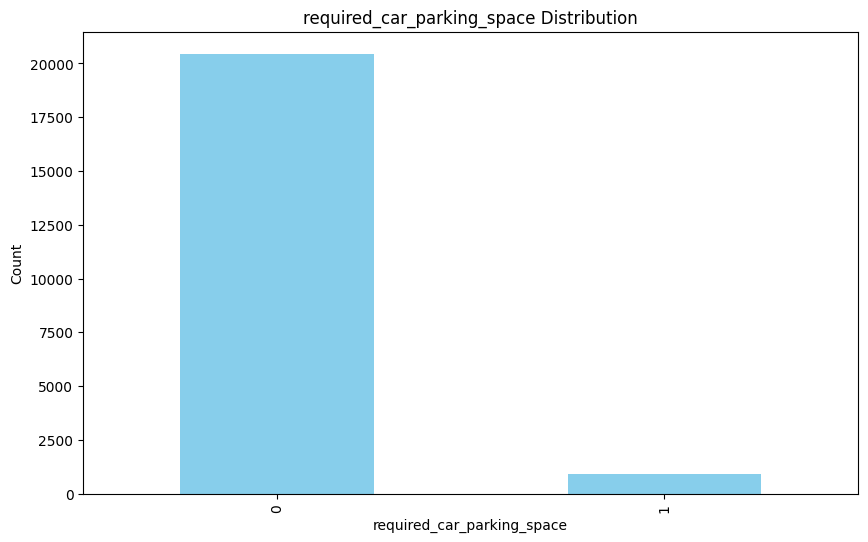

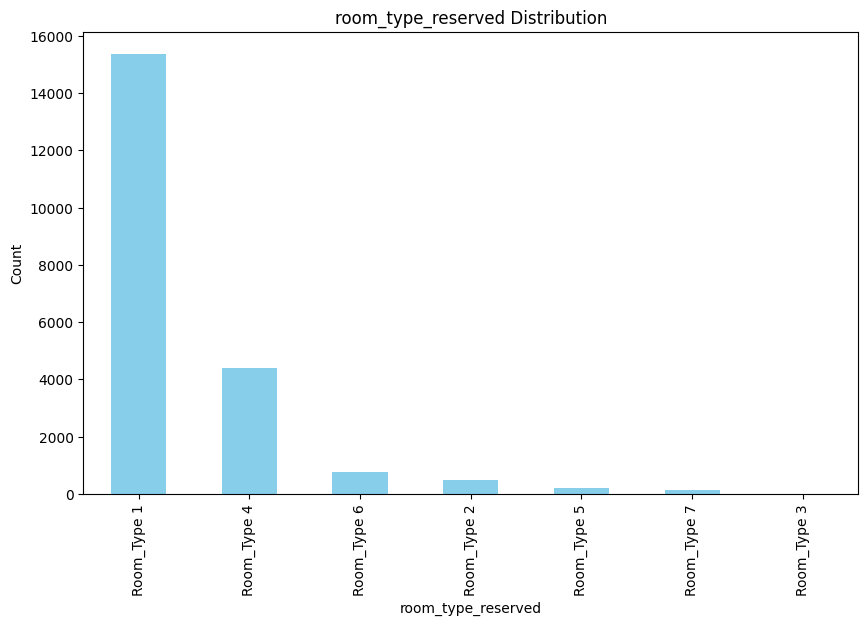

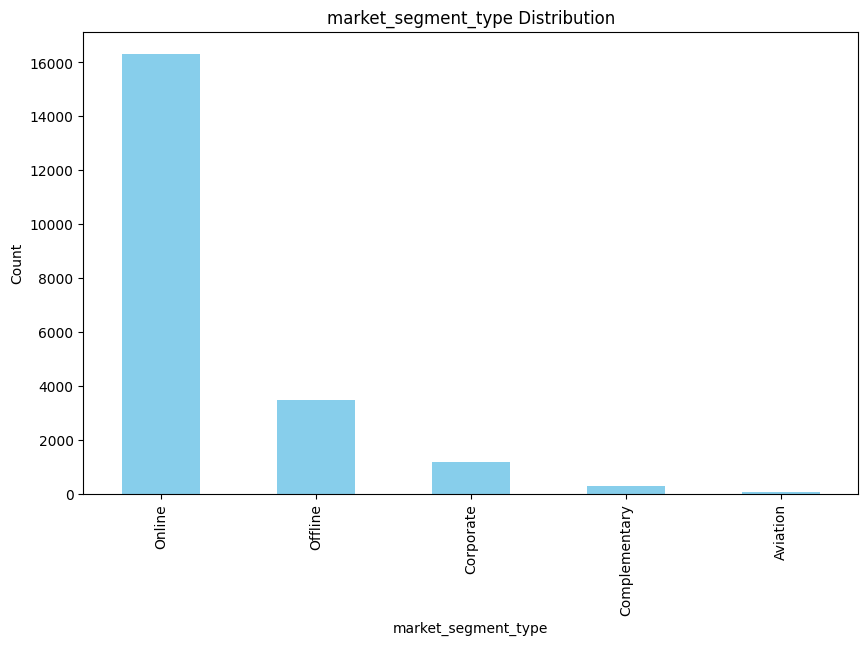

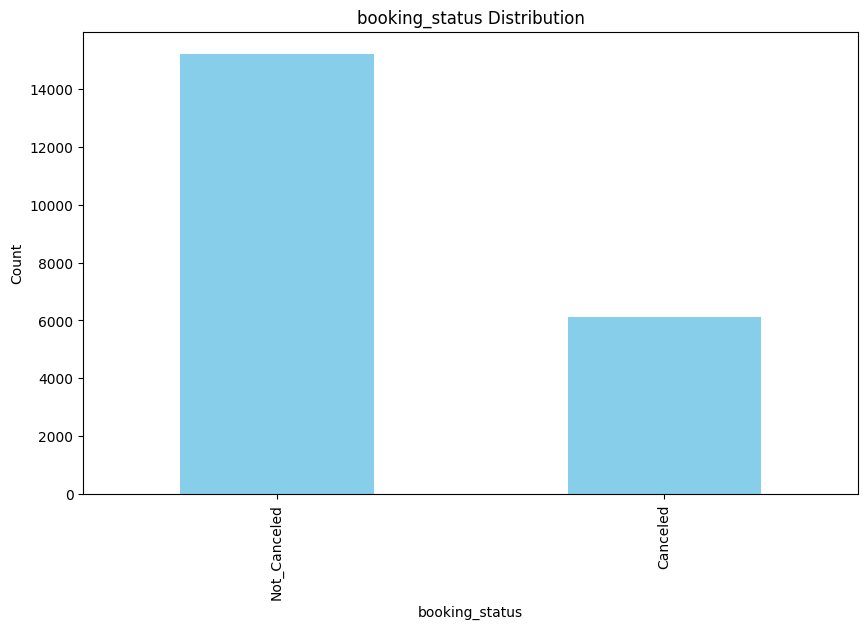

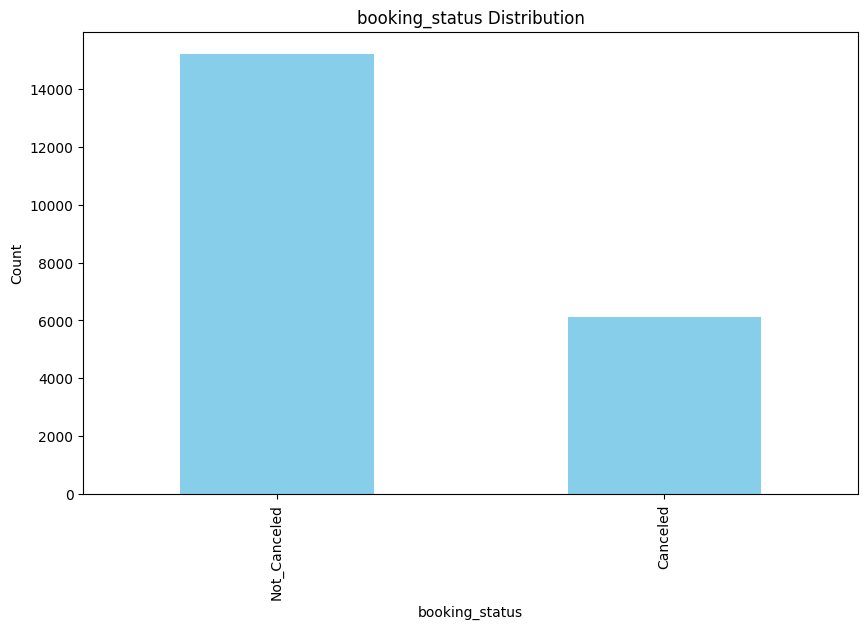

In [320]:
for cat_feature in cat_cols:
    plt.figure(figsize=(10,6))
    data[cat_feature].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'{cat_feature} Distribution')
    plt.xlabel(cat_feature)
    plt.ylabel('Count')
    plt.show()

#### Bivariant Analysis

In [321]:
def plot_bivariate_num(data, target, num_features):
    num_plots= len(num_features)
    num_rows = (num_plots + 1) // 2
    fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows * 5))
    axes = axes.flatten()

    for i, column in enumerate(num_features):
        sns.boxplot(x=target, y=column, data=data, ax=axes[i], palette="Set2")
        axes[i].set_title(f'{column} vs {target}')

    plt.tight_layout()
    plt.show()

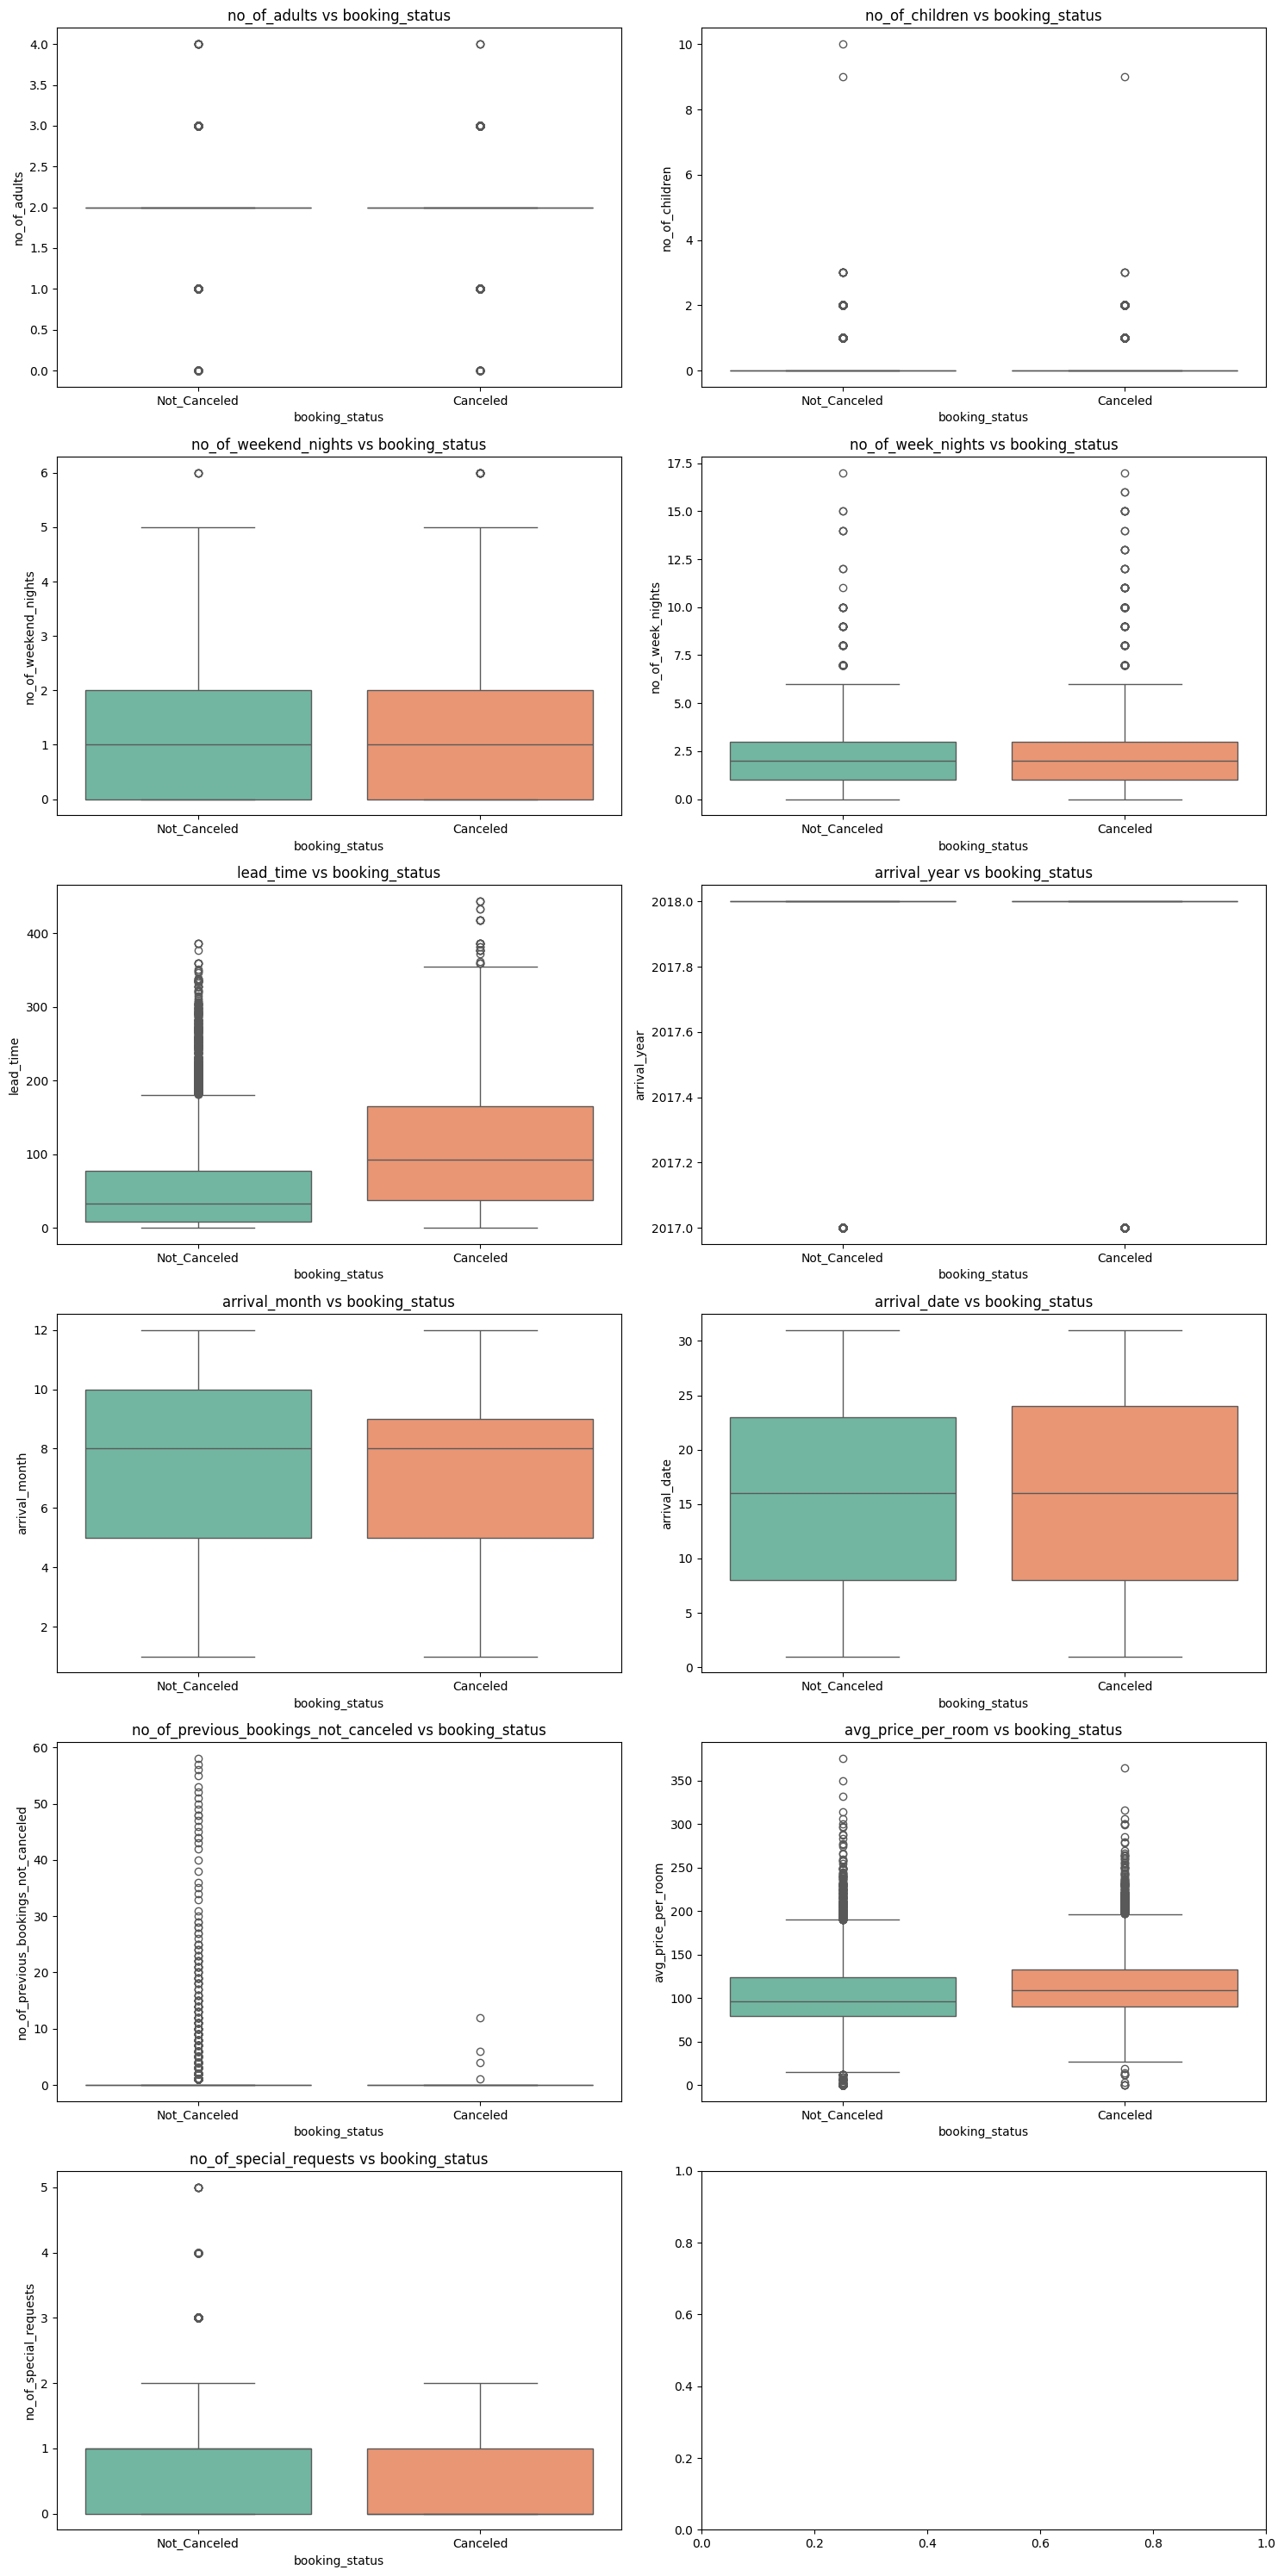

In [322]:
plot_bivariate_num(data, 'booking_status', num_cols)

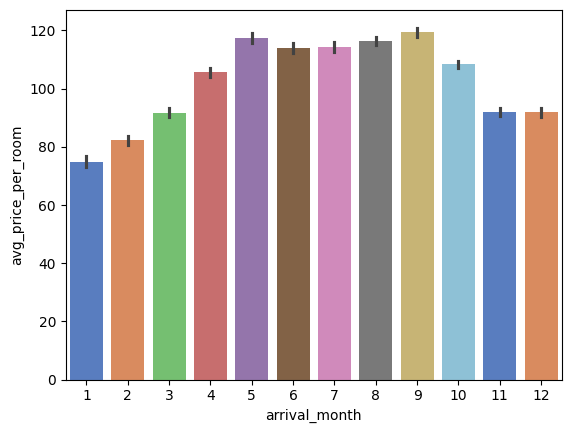

In [323]:
sns.barplot(x='arrival_month', y='avg_price_per_room', data=data, palette="muted")
plt.show()

In [324]:
def plot_bivariate_cat (data, target, cat_features):
    num_features= len(cat_features)
    num_plots= len(cat_features)
    num_rows = (num_features + 1) // 2
    fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows * 5))
    axes = axes.flatten()

    for i, feature in enumerate(cat_features):
        sns.countplot(x=column, hue=target, data=data, ax=axes[i], palette="Set2")
        axes[i].set_title(f'{column} vs {target}')
        axes[i].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

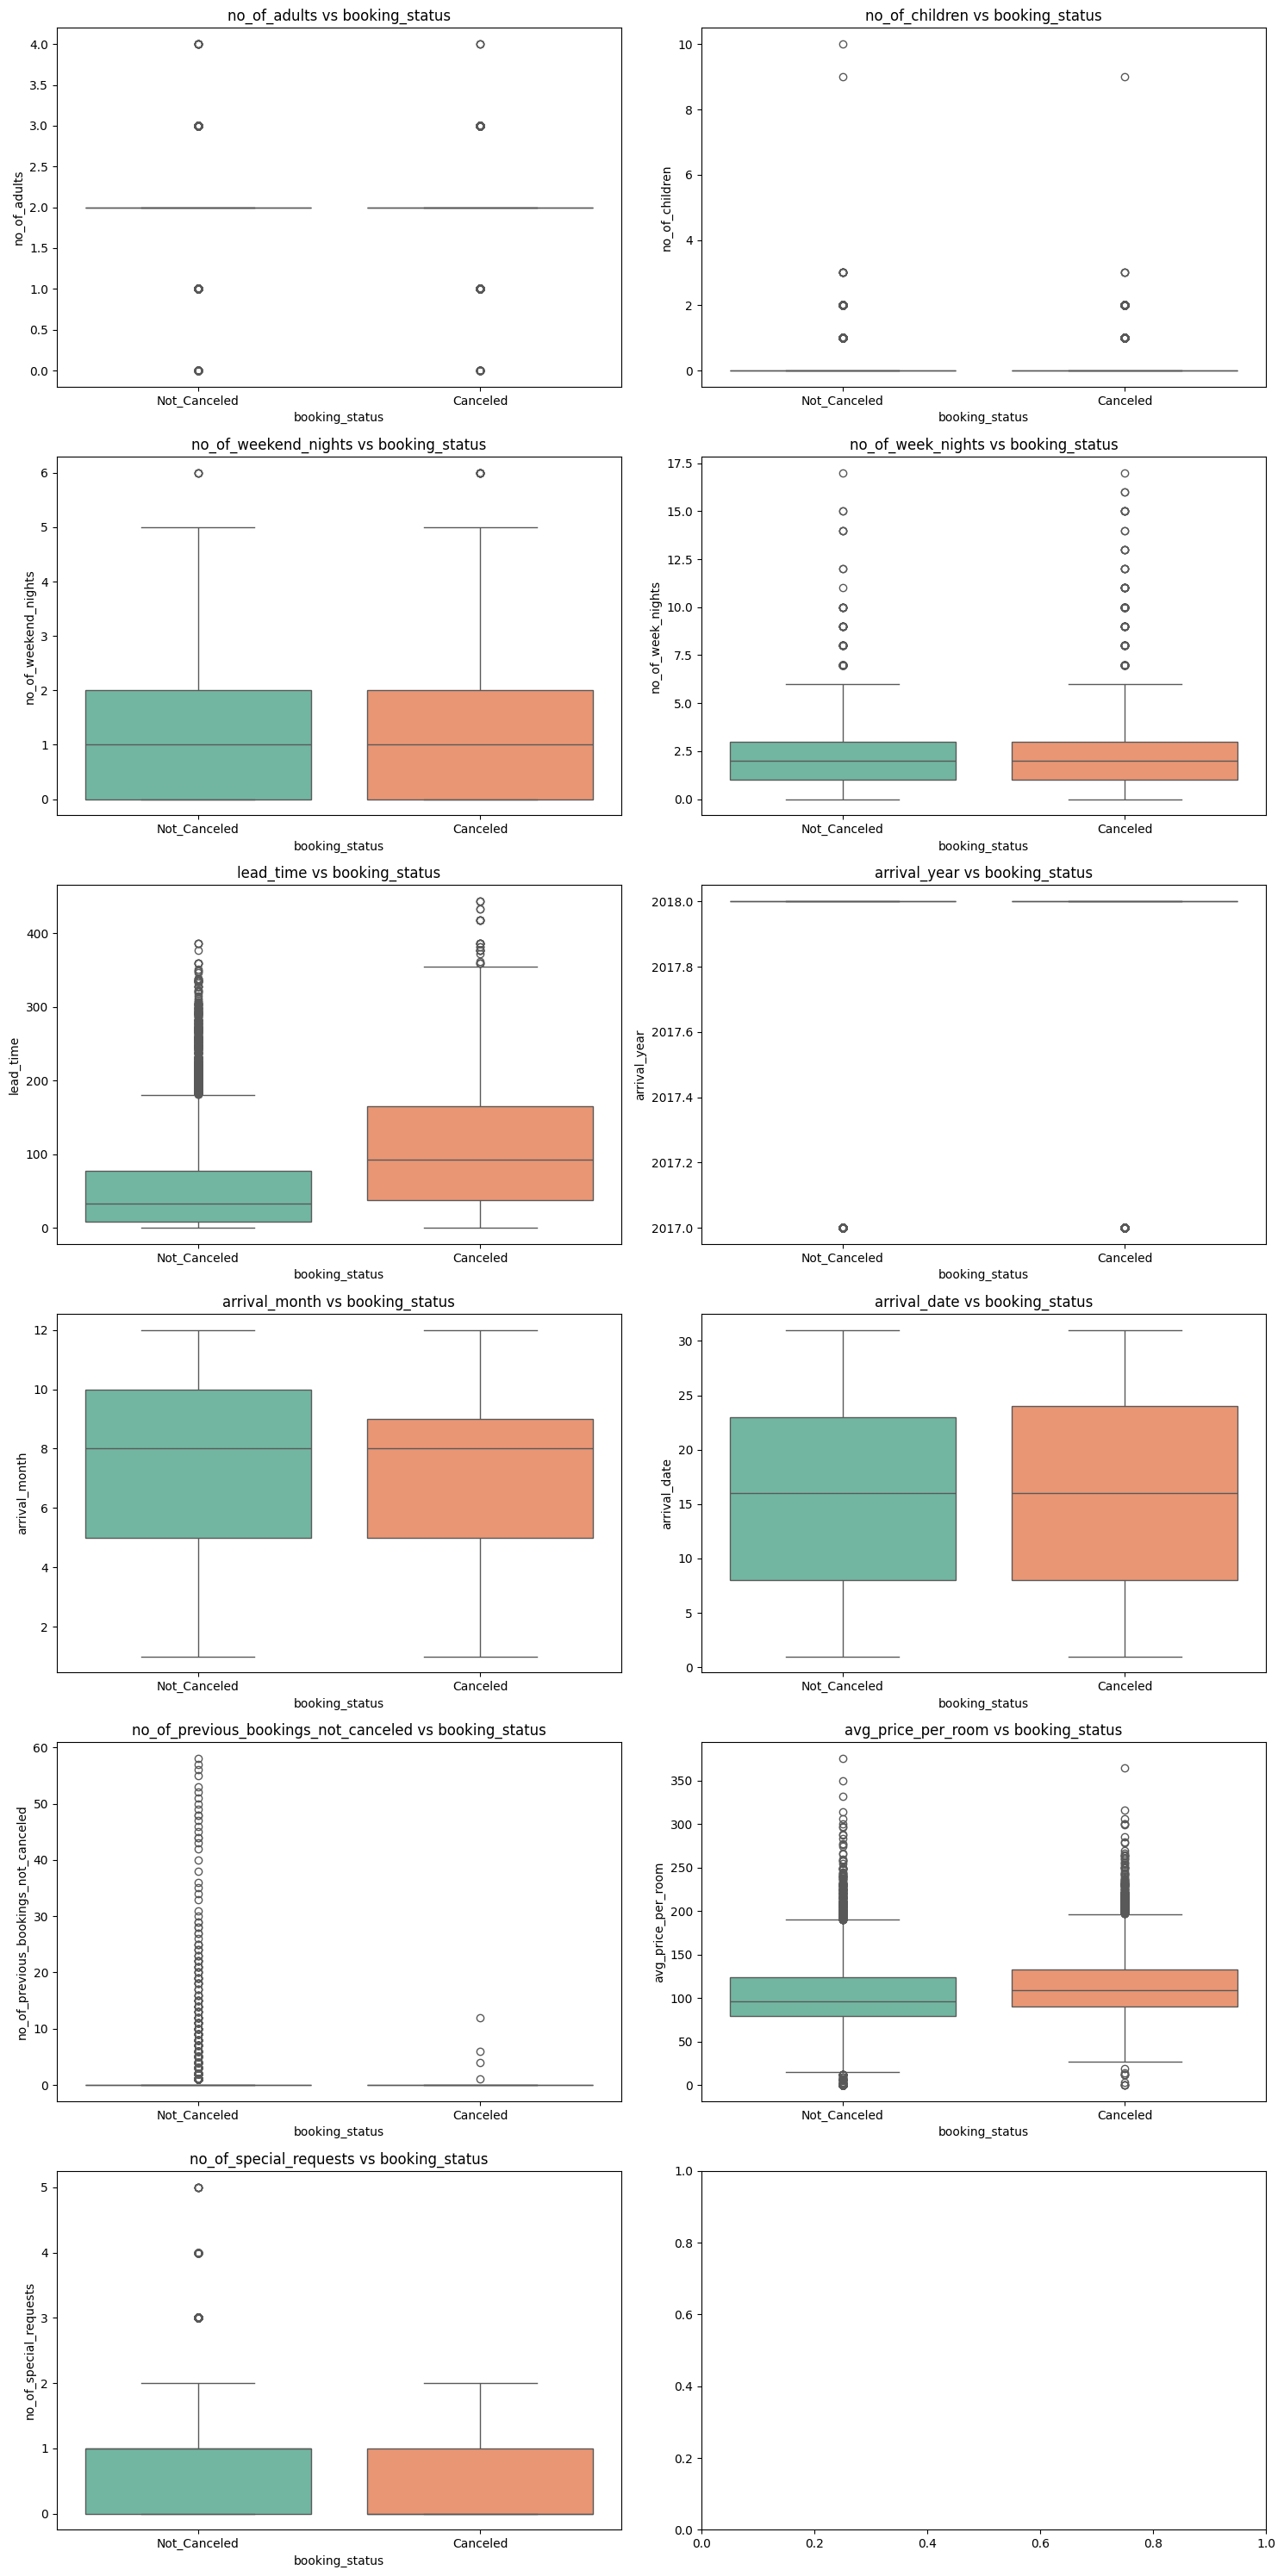

In [325]:
plot_bivariate_num(data, 'booking_status', num_cols)

##### DATA PROCESSING

In [326]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [327]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21359 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21359 non-null  int64  
 1   no_of_children                        21359 non-null  int64  
 2   no_of_weekend_nights                  21359 non-null  int64  
 3   no_of_week_nights                     21359 non-null  int64  
 4   type_of_meal_plan                     21359 non-null  object 
 5   required_car_parking_space            21359 non-null  int64  
 6   room_type_reserved                    21359 non-null  object 
 7   lead_time                             21359 non-null  int64  
 8   arrival_year                          21359 non-null  int64  
 9   arrival_month                         21359 non-null  int64  
 10  arrival_date                          21359 non-null  int64  
 11  market_segment_type 

##### Label encoding 

In [328]:
from sklearn.preprocessing import LabelEncoder

In [329]:
label_encoder = LabelEncoder()

mappings = {}

for col in cat_cols:
    data[col] = label_encoder.fit_transform(data[col])
    mappings[col] = {label:code for label, code in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))}

In [330]:
mappings

{'type_of_meal_plan': {'Meal Plan 1': np.int64(0),
  'Meal Plan 2': np.int64(1),
  'Meal Plan 3': np.int64(2),
  'Not Selected': np.int64(3)},
 'required_car_parking_space': {np.int64(0): np.int64(0),
  np.int64(1): np.int64(1)},
 'room_type_reserved': {'Room_Type 1': np.int64(0),
  'Room_Type 2': np.int64(1),
  'Room_Type 3': np.int64(2),
  'Room_Type 4': np.int64(3),
  'Room_Type 5': np.int64(4),
  'Room_Type 6': np.int64(5),
  'Room_Type 7': np.int64(6)},
 'market_segment_type': {'Aviation': np.int64(0),
  'Complementary': np.int64(1),
  'Corporate': np.int64(2),
  'Offline': np.int64(3),
  'Online': np.int64(4)},
 'booking_status': {np.int64(0): np.int64(0), np.int64(1): np.int64(1)}}

In [331]:
data.head() 

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,0,0,0,26,2017,10,17,4,0,0,0,161.00,0,1
1,2,1,1,1,0,0,0,98,2018,7,16,4,0,0,0,121.50,2,1
2,2,0,0,3,0,0,0,433,2018,9,8,3,0,0,0,70.00,0,0
3,2,0,2,5,0,0,0,195,2018,8,8,3,0,0,0,72.25,0,1
4,1,0,0,2,0,0,0,188,2018,6,15,3,0,0,0,130.00,0,0


In [332]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21359 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21359 non-null  int64  
 1   no_of_children                        21359 non-null  int64  
 2   no_of_weekend_nights                  21359 non-null  int64  
 3   no_of_week_nights                     21359 non-null  int64  
 4   type_of_meal_plan                     21359 non-null  int64  
 5   required_car_parking_space            21359 non-null  int64  
 6   room_type_reserved                    21359 non-null  int64  
 7   lead_time                             21359 non-null  int64  
 8   arrival_year                          21359 non-null  int64  
 9   arrival_month                         21359 non-null  int64  
 10  arrival_date                          21359 non-null  int64  
 11  market_segment_type 

##### Multicolinearity

In [333]:
!pip install statsmodels

In [334]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [335]:
X = add_constant(data)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [336]:
vif_data

,feature,VIF
0,const,4.100197e+07
1,no_of_adults,1.341180e+00
2,no_of_children,1.282459e+00
3,no_of_weekend_nights,1.073215e+00
4,no_of_week_nights,1.125260e+00
5,type_of_meal_plan,1.178228e+00
6,required_car_parking_space,1.036105e+00
7,room_type_reserved,1.549859e+00
8,lead_time,1.406287e+00
9,arrival_year,1.288533e+00


#### Our DATA dont have any muticolinearity 

In [337]:
corr = data.corr()

In [338]:
corr

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
no_of_adults,1.000000,-0.049738,0.092764,0.114218,-0.005977,0.000419,0.275089,0.150995,0.096366,0.004833,0.018382,0.310783,-0.238974,-0.063739,-0.143903,0.327749,0.156833,-0.097198
no_of_children,-0.049738,1.000000,0.011033,0.019408,-0.102631,0.018089,0.351786,0.010094,0.036248,0.002606,0.027934,0.103359,-0.048678,-0.020954,-0.029112,0.352640,0.099069,-0.060030
no_of_weekend_nights,0.092764,0.011033,1.000000,0.223154,-0.041123,-0.057417,0.029964,0.131240,0.029016,0.011300,0.006921,0.091510,-0.088633,-0.028935,-0.040008,-0.003579,0.013803,-0.067944
no_of_week_nights,0.114218,0.019408,0.223154,1.000000,-0.073247,-0.061798,0.085547,0.223953,0.022199,0.030029,-0.000633,0.116978,-0.115186,-0.033133,-0.051829,0.018420,0.032304,-0.124415
type_of_meal_plan,-0.005977,-0.102631,-0.041123,-0.073247,1.000000,-0.024666,-0.245616,-0.055124,0.094627,0.008576,-0.006094,0.184654,-0.075476,-0.017205,-0.044891,-0.100708,-0.011933,-0.035864
required_car_parking_space,0.000419,0.018089,-0.057417,-0.061798,-0.024666,1.000000,0.016335,-0.046767,0.010158,-0.015330,-0.009352,-0.039210,0.113582,0.026876,0.066665,0.055536,0.075479,0.092511
room_type_reserved,0.275089,0.351786,0.029964,0.085547,-0.245616,0.016335,1.000000,-0.014666,0.090492,0.001906,0.024315,0.089176,-0.045353,-0.013842,-0.024727,0.490983,0.086319,-0.072128
lead_time,0.150995,0.010094,0.131240,0.223953,-0.055124,-0.046767,-0.014666,1.000000,0.169463,0.132140,0.034112,0.140396,-0.148948,-0.053930,-0.087026,-0.044061,-0.012787,-0.368151
arrival_year,0.096366,0.036248,0.029016,0.022199,0.094627,0.010158,0.090492,0.169463,1.000000,-0.322786,0.011340,0.111445,-0.010158,0.011111,0.025551,0.174569,0.000594,-0.149673
arrival_month,0.004833,0.002606,0.011300,0.030029,0.008576,-0.015330,0.001906,0.132140,-0.322786,1.000000,-0.020386,-0.017885,0.001744,-0.043586,-0.003881,0.066156,0.136037,0.015898


<Axes: >

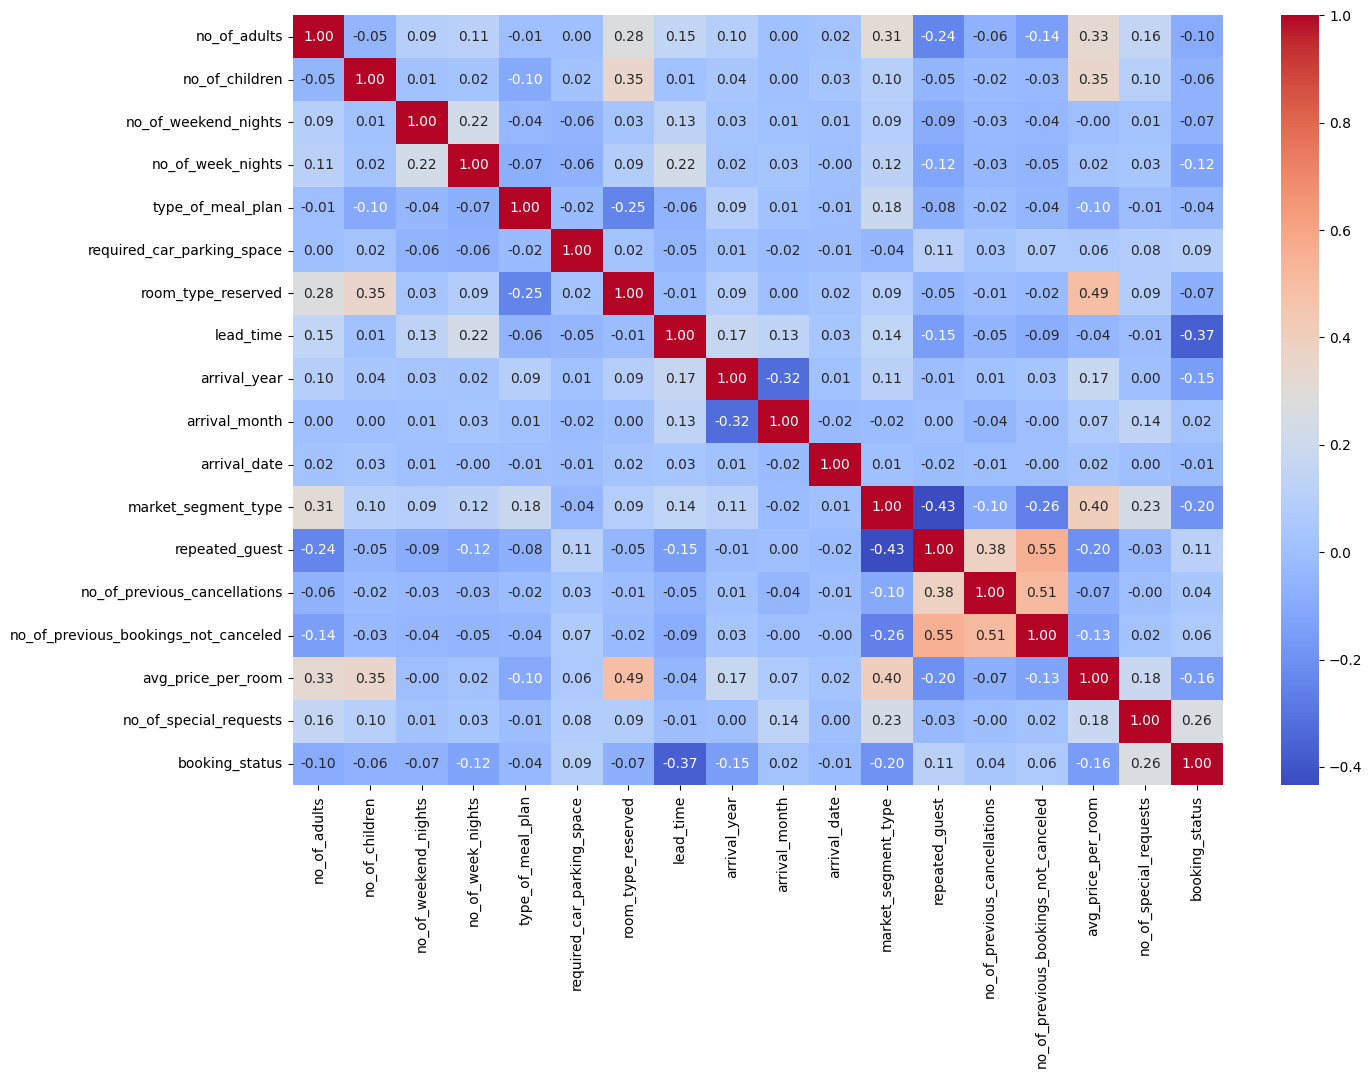

In [339]:
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")

#### Skewness

In [340]:
skewness = data.skew()

In [341]:
skewness

no_of_adults                            -0.305652
no_of_children                           4.165696
no_of_weekend_nights                     0.636637
no_of_week_nights                        1.553657
type_of_meal_plan                        1.650716
required_car_parking_space               4.538315
room_type_reserved                       1.392145
lead_time                                1.405258
arrival_year                            -1.953273
arrival_month                           -0.293266
arrival_date                             0.010333
market_segment_type                     -2.333046
repeated_guest                           5.282330
no_of_previous_cancellations            22.001489
no_of_previous_bookings_not_canceled    16.735934
avg_price_per_room                       0.542888
no_of_special_requests                   0.922373
booking_status                          -0.942305
dtype: float64

In [342]:
for col in data.columns:
    if skewness[col] > 5:
        data[col] = np.log1p(data[col])

In [343]:
data["booking_status"].value_counts()

booking_status
1    15231
0     6128
Name: count, dtype: int64

In [344]:
X = data.drop(columns = "booking_status")
Y = data["booking_status"]


In [345]:
X.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')

In [346]:
!pip install imbalanced-learn

In [347]:
Y.value_counts()

booking_status
1    15231
0     6128
Name: count, dtype: int64

In [348]:
from imblearn.over_sampling import SMOTE

In [349]:
smote = SMOTE(random_state=42)
X_res, Y_res = smote.fit_resample(X, Y)

In [350]:
Y_res.value_counts()

booking_status
1    15231
0    15231
Name: count, dtype: int64

In [351]:
data.shape

(21359, 18)

In [352]:
balanced_data = pd.DataFrame(X_res, columns=X.columns)
balanced_data['booking_status'] = Y_res

In [353]:
balanced_data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,0,0,0,26,2017,10,17,4,0.0,0.0,0.0,161.00,0,1
1,2,1,1,1,0,0,0,98,2018,7,16,4,0.0,0.0,0.0,121.50,2,1
2,2,0,0,3,0,0,0,433,2018,9,8,3,0.0,0.0,0.0,70.00,0,0
3,2,0,2,5,0,0,0,195,2018,8,8,3,0.0,0.0,0.0,72.25,0,1
4,1,0,0,2,0,0,0,188,2018,6,15,3,0.0,0.0,0.0,130.00,0,0


In [354]:
balanced_data.shape

(30462, 18)

In [355]:
data = balanced_data.copy()

In [356]:
data.shape

(30462, 18)

##### Feature Selection

In [357]:
len(data.columns)

18

In [358]:
from sklearn.ensemble import RandomForestClassifier

In [359]:
X = data.drop(columns=["booking_status"])
Y = data["booking_status"]

In [360]:
model = RandomForestClassifier(random_state=42)
model.fit(X, Y)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [361]:
Feature_importance = model.feature_importances_

In [362]:
Feature_importance_data = pd.DataFrame({
    'Feature': X.columns,
    'Importance': Feature_importance
})

In [363]:
top_features_importance_df = Feature_importance_data.sort_values(by='Importance', ascending=False)

In [364]:
top_10_features = top_features_importance_df["Feature"].head(10).values
top_10_df = data[top_10_features.tolist() + ["booking_status"]]

In [365]:
top_10_df.head()

,lead_time,no_of_special_requests,avg_price_per_room,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,type_of_meal_plan,room_type_reserved,booking_status
0,26,0,161.00,10,17,4,1,2,0,0,1
1,98,2,121.50,7,16,4,1,1,0,0,1
2,433,0,70.00,9,8,3,3,0,0,0,0
3,195,0,72.25,8,8,3,5,2,0,0,1
4,188,0,130.00,6,15,3,2,0,0,0,0


In [366]:
len(top_10_df.columns)

11

#### MODEL SELECTION

In [367]:
data = top_10_df.copy()

In [368]:
!pip install xgboost lightgbm

In [375]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

try:
	from xgboost import XGBClassifier
except Exception as e:
	print(f"Warning: XGBoost could not be imported: {e}")
	XGBClassifier = None

try:
	from lightgbm import LGBMClassifier
except Exception as e:
	print(f"Warning: LightGBM could not be imported: {e}")
	LGBMClassifier = None

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed
    - vcomp140.dll or libgomp-1.dll for Windows
    - libomp.dylib for Mac OSX
    - libgomp.so for Linux and other UNIX-like OSes
    Mac OSX users: Run `brew install libomp` to install OpenMP runtime.

  * You are running 32-bit Python on a 64-bit OS

Error message(s): ['dlopen(/Users/user1/Documents/Projects/MLOps/MLops-project-1/venv/lib/python3.14/site-packages/xgboost/lib/libxgboost.dylib, 0x0006): Symbol not found: ___kmpc_dispatch_deinit\n  Referenced from: <2B45A273-7403-3BBA-8DBD-A90F576E2F02> /Users/user1/Documents/Projects/MLOps/MLops-project-1/venv/lib/python3.14/site-packages/xgboost/lib/libxgboost.dylib\n  Expected in:     <CB388228-4175-3A2B-8234-40890A437384> /usr/local/Cellar/libomp/17.0.6/lib/libomp.dylib']



In [374]:
!pip uninstall -y xgboost
!pip cache purge
!pip install -U pip setuptools wheel
!pip install xgboost


Found existing installation: xgboost 3.1.3
Uninstalling xgboost-3.1.3:
  Successfully uninstalled xgboost-3.1.3
Files removed: 799 (245.6 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 10.2 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 9.4 MB/s  0:00:00
  Attempting uninstall: pip90m╺━━━━━━━━━━━━━━━━━━━━━━━━━━ 1/3 [setuptools]
    Found existing installation: pip 25.3━━━━━━━━━━━━━━━━━━━━━ 1/3 [setuptools]
    Uninstalling pip-25.3:━━━━━━━━╸━━━━━━━━━━━━━ 2/3 [pip]ls]
      Successfully uninstalled pip-25.3╸━━━━━━━━━━━━━ 2/3 [pip]
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [pip]2/3 [pip]
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 7.7 MB/s  0:00:00 eta 0:00:01


In [383]:
from lightgbm import LGBMClassifier

classifiers["LightGBM"] = LGBMClassifier(verbose=-1)   # or verbosity=-1 depending on version


In [384]:
classifiers["LightGBM"] = LGBMClassifier(verbosity=-1)


In [376]:
X = data.drop(columns=["booking_status"])
Y = data["booking_status"]

In [377]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)   

In [380]:
classifiers = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Support Vector Machine": SVC(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "KNN" : KNeighborsClassifier(),
    "XGBoost" : XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42) if XGBClassifier is not None else None,
    "LightGBM" : LGBMClassifier(random_state=42) if LGBMClassifier is not None else None
}

In [381]:
metrics = {
    "Model": [ ],
    "Accuracy": [ ],
    "Precision": [ ],
    "Recall": [ ],
    "F1 Score": [ ]
}

In [385]:
for model_name,classifier in classifiers.items():
    if classifier is not None:
        classifier.fit(X_train, Y_train)
        Y_pred = classifier.predict(X_test)

        acc = accuracy_score(Y_test, Y_pred)
        prec = precision_score(Y_test, Y_pred)
        rec = recall_score(Y_test, Y_pred)
        f1 = f1_score(Y_test, Y_pred)

        metrics["Model"].append(model_name)
        metrics["Accuracy"].append(acc)
        metrics["Precision"].append(prec)
        metrics["Recall"].append(rec)
        metrics["F1 Score"].append(f1)

In [386]:
metrics_df = pd.DataFrame(metrics)

In [387]:
metrics

{'Model': ['Logistic Regression',
  'Random Forest',
  'Gradient Boosting',
  'AdaBoost',
  'Support Vector Machine',
  'Decision Tree',
  'Naive Bayes',
  'K-Nearest Neighbors',
  'KNN',
  'LightGBM',
  'Logistic Regression',
  'Random Forest',
  'Gradient Boosting',
  'AdaBoost',
  'Support Vector Machine',
  'Decision Tree',
  'Naive Bayes',
  'K-Nearest Neighbors',
  'KNN',
  'LightGBM'],
 'Accuracy': [0.769735762350238,
  0.8860988019038241,
  0.8294764483833907,
  0.8009190874774331,
  0.7241096340062366,
  0.8393238142130314,
  0.7648120794354177,
  0.7830297062202527,
  0.7830297062202527,
  0.8595109141637945,
  0.769735762350238,
  0.8860988019038241,
  0.8294764483833907,
  0.8009190874774331,
  0.7241096340062366,
  0.8393238142130314,
  0.7648120794354177,
  0.7830297062202527,
  0.7830297062202527,
  0.8595109141637945],
 'Precision': [0.7869367796018163,
  0.8873517786561265,
  0.8142812402129659,
  0.8146240988671473,
  0.7317487266553481,
  0.8492734031767489,
  0.7897

In [388]:
metrics_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.769736,0.786937,0.739659,0.762566
1,Random Forest,0.886099,0.887352,0.884439,0.885893
2,Gradient Boosting,0.829476,0.814281,0.853578,0.833467
3,AdaBoost,0.800919,0.814624,0.779054,0.796442
4,Support Vector Machine,0.724110,0.731749,0.707485,0.719412
5,Decision Tree,0.839324,0.849273,0.825016,0.836969
6,Naive Bayes,0.764812,0.789795,0.721602,0.754160
7,K-Nearest Neighbors,0.783030,0.850122,0.687131,0.759985
8,KNN,0.783030,0.850122,0.687131,0.759985
9,LightGBM,0.859511,0.844556,0.881156,0.862468


#### TRAIN RF MODEL

In [389]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

In [390]:
X = data.drop(columns=["booking_status"])
Y = data["booking_status"]

In [391]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)   

In [392]:
rf = RandomForestClassifier(random_state=42)

In [ ]:
param_dist = {
    'n_estimators': randint(50, 300),
    'max_depth': randint(5, 30),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'bootstrap': [True, False]
}

In [395]:
# ensure param_dist is defined (so this cell can run standalone)
try:
    param_dist
except NameError:
    param_dist = {
        'n_estimators': randint(50, 300),
        'max_depth': randint(5, 30),
        'min_samples_split': randint(2, 10),
        'min_samples_leaf': randint(1, 10),
        'bootstrap': [True, False]
    }

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=50,
    scoring='accuracy',
    cv=5,
    random_state=42,
    n_jobs=-1
)

In [396]:
random_search.fit(X_train, Y_train)

,"estimator estimator: estimator objectAn object of that type is instantiated for each grid point.This is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",RandomForestC...ndom_state=42)
,"param_distributions param_distributions: dict or list of dictsDictionary with parameters names (`str`) as keys and distributionsor lists of parameters to try. Distributions must provide a ``rvs``method for sampling (such as those from scipy.stats.distributions).If a list is given, it is sampled uniformly.If a list of dicts is given, first a dict is sampled uniformly, andthen a parameter is sampled using that dict as above.","{'bootstrap': [True, False], 'max_depth': <scipy.stats....t 0x123229f90>, 'min_samples_leaf': <scipy.stats....t 0x122618d60>, 'min_samples_split': <scipy.stats....t 0x123229090>, ...}"
,"n_iter n_iter: int, default=10Number of parameter settings that are sampled. n_iter tradesoff runtime vs quality of the solution.",50
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.If None, the estimator's score method is used.",'accuracy'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given the ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``RandomizedSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the vari

In [397]:
random_search.best_params_

{'bootstrap': False,
 'max_depth': 21,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 179}

In [398]:
best_rf_model = random_search.best_estimator_

In [399]:
Y_pred = best_rf_model.predict(X_test)

In [400]:
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)

In [401]:
accuracy

0.8860988019038241

In [402]:
precision

0.8845650752125572

In [403]:
recall

0.8880499015101773

In [404]:
f1

0.8863040629095675

#### SAVE THE MODEL 

In [405]:
import joblib

In [406]:
joblib.dump(best_rf_model, 'best_random_forest_model.pkl')

['best_random_forest_model.pkl']

In [407]:
loaded_model = joblib.load('best_random_forest_model.pkl')

In [408]:
X_train[0:1]

,lead_time,no_of_special_requests,avg_price_per_room,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,type_of_meal_plan,room_type_reserved
5872,19,1,148.0,12,30,4,2,0,0,3


In [ ]:
new_data = np.array([19, 1, 148.0, 12, 30, 4, 2, 0, 0, 3])

In [410]:
import numpy as np

new_data = np.array([19, 1, 148.0, 12, 30, 4, 2, 0, 0, 3])
prediction = loaded_model.predict(new_data.reshape(1, -1))
print(f"Prediction: {prediction}")

Prediction: [1]
